<a href="https://colab.research.google.com/github/Saleem-144/MachineLearning-Project/blob/main/Fraud_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DATA PREPROCESSING

import pandas as pd
pd.set_option('display.max_rows', 600)

In [ ]:
cust = pd.read_csv("https://raw.githubusercontent.com/Saleem-144/MachineLearning-Project/main/cust.csv")
trans = pd.read_csv("https://raw.githubusercontent.com/Saleem-144/MachineLearning-Project/main/trans.csv")

In [ ]:
cust.head()


,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [ ]:
trans.head()


,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [ ]:
cust.info(),trans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            -----

(None, None)

In [ ]:
cust.isnull().sum()

Unnamed: 0                0
customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64

In [ ]:
trans.isnull().sum()

Unnamed: 0                          0
customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

In [ ]:
merged_df = pd.merge(cust, trans, on='customerEmail', how='inner')

In [ ]:
merged_df.head()

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,2,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,3,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,4,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [ ]:
merged_df = merged_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

In [ ]:
merged_df.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [ ]:
#EDA

In [ ]:
print("Summary statistics of numerical columns:\n")
print(merged_df.describe())

Summary statistics of numerical columns:

       No_Transactions   No_Orders  No_Payments  \
count       819.000000  819.000000   819.000000   
mean          5.195360    3.808303     2.135531   
std           2.924214    1.866872     1.860001   
min           0.000000    0.000000     0.000000   
25%           3.000000    3.000000     1.000000   
50%           5.000000    4.000000     2.000000   
75%           7.000000    5.000000     3.000000   
max          15.000000    8.000000    15.000000   

       paymentMethodRegistrationFailure  transactionAmount  transactionFailed  
count                        819.000000         819.000000         819.000000  
mean                           0.100122          35.147741           0.256410  
std                            0.300346          19.640072           0.436918  
min                            0.000000          10.000000           0.000000  
25%                            0.000000          22.000000           0.000000  
50%               

In [ ]:
#DATA Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns


In [ ]:
numerical_features = ['No_Transactions', 'No_Orders', 'No_Payments',]

<Figure size 1500x1000 with 0 Axes>

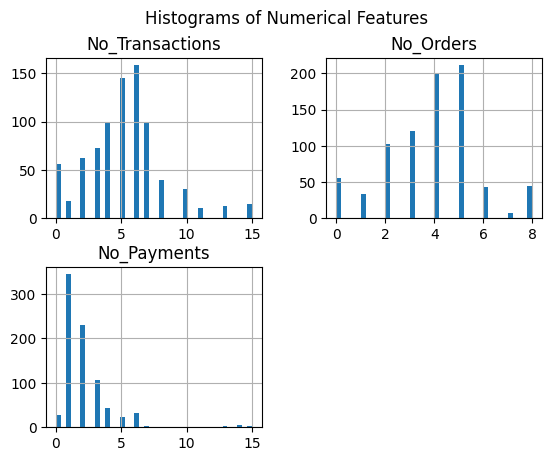

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(left=None, bottom=0.5, right=None, top=0.95)
merged_df[numerical_features].hist(bins=40)
plt.suptitle('Histograms of Numerical Features')
plt.show()



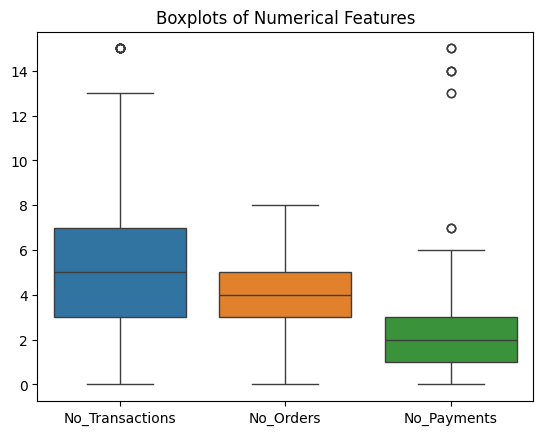

In [ ]:
sns.boxplot(data=merged_df[numerical_features])
plt.title('Boxplots of Numerical Features')
plt.show()

In [ ]:
merged_df.describe()


,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,5.195360,3.808303,2.135531,0.100122,35.147741,0.256410
std,2.924214,1.866872,1.860001,0.300346,19.640072,0.436918
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,3.000000,3.000000,1.000000,0.000000,22.000000,0.000000
50%,5.000000,4.000000,2.000000,0.000000,34.000000,0.000000
75%,7.000000,5.000000,3.000000,0.000000,46.000000,1.000000
max,15.000000,8.000000,15.000000,1.000000,353.000000,1.000000


In [ ]:
Q1 = merged_df[numerical_features].quantile(0.25)
Q3 = merged_df[numerical_features].quantile(0.75)

In [ ]:
Q1

No_Transactions    3.0
No_Orders          3.0
No_Payments        1.0
Name: 0.25, dtype: float64

In [ ]:
Q3

No_Transactions    7.0
No_Orders          5.0
No_Payments        3.0
Name: 0.75, dtype: float64

In [ ]:
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
print("lower bound :\n",lower_bound)
print("upper bound :\n",upper_bound)

lower bound :
 No_Transactions   -3.0
No_Orders          0.0
No_Payments       -2.0
dtype: float64
upper bound :
 No_Transactions    13.0
No_Orders           8.0
No_Payments         6.0
dtype: float64


In [ ]:
(merged_df[numerical_features] < lower_bound)

,No_Transactions,No_Orders,No_Payments
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
814,False,False,False
815,False,False,False
816,False,False,False
817,False,False,False


In [ ]:
(merged_df[numerical_features] > upper_bound)

,No_Transactions,No_Orders,No_Payments
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
814,False,False,False
815,False,False,False
816,False,False,False
817,False,False,False


In [ ]:
outliers = (merged_df[numerical_features] < lower_bound) | (merged_df[numerical_features] > upper_bound)

In [ ]:
merged_df_cleaned = merged_df[~outliers.any(axis=1)]
merged_df_cleaned.shape

(792, 18)

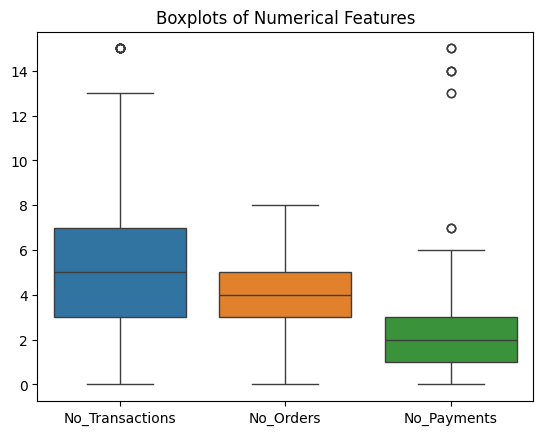

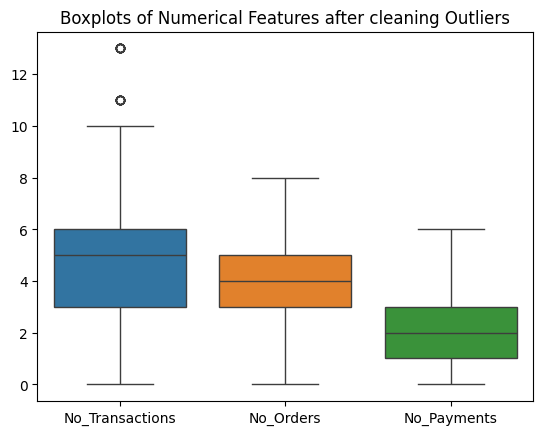

In [ ]:
sns.boxplot(data=merged_df[numerical_features])
plt.title('Boxplots of Numerical Features')
plt.show()


sns.boxplot(merged_df_cleaned[numerical_features])
plt.title('Boxplots of Numerical Features after cleaning Outliers')
plt.show()

In [ ]:
outlier_rows = merged_df[outliers.any(axis=1)]

In [ ]:
outlier_rows.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
450,cathy42@gibson.com,754.248.6239x43965,c3r2qzqwc9anp6utob7n,7493:ab04:47ff:3a14:67d6:a128:a5b6:1500,"046 Carson Crescent\nSouth Jacksonview, NV 228...",3,3,15,True,h469bpo6,d5r0n3,d1nvhtt2q,0,card,Diners Club / Carte Blanche,14,0,fulfilled
451,cathy42@gibson.com,754.248.6239x43965,c3r2qzqwc9anp6utob7n,7493:ab04:47ff:3a14:67d6:a128:a5b6:1500,"046 Carson Crescent\nSouth Jacksonview, NV 228...",3,3,15,True,vj05ozm5,8lc2cq,d1nvhtt2q,0,card,Diners Club / Carte Blanche,23,0,fulfilled


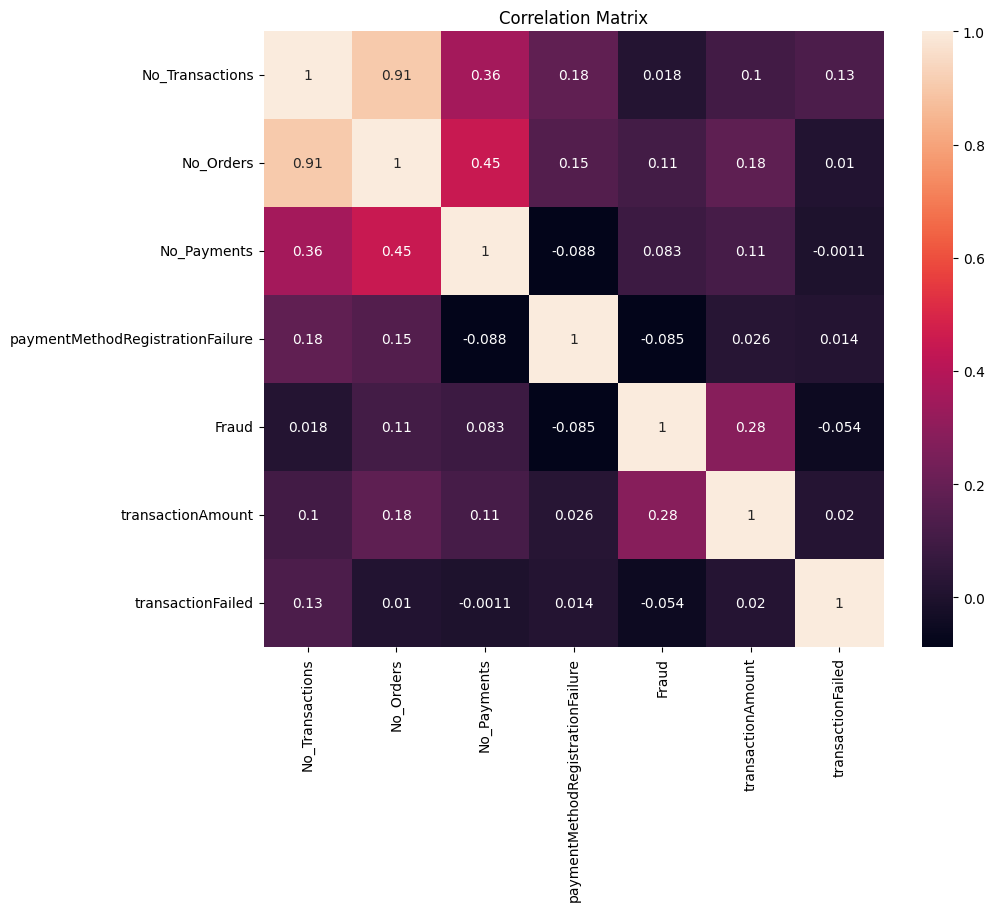

In [ ]:
correlation_matrix = merged_df_cleaned[["No_Transactions","No_Orders","No_Payments",
                                        "paymentMethodRegistrationFailure",
                                        "Fraud","transactionAmount","transactionFailed"]].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()